
0: 640x448 2 persons, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


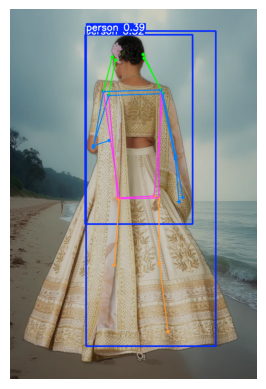

In [49]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np  

# Load the YOLOv8 model for pose estimation
model = YOLO("yolov8n-pose.pt")  # You can choose other variants like "yolov8s-pose.pt"

# Load the image
image_path = "final_outputs/6/final_bg_removed_a_photo_of_WH1TE_HOM14154_900x.webp"
image = cv2.imread(image_path)

# Run pose estimation on the image
results = model(image)

# Visualize the results
# YOLOv8 automatically draws keypoints on the image
annotated_image = results[0].plot()
keypoints = results[0].keypoints.cpu().numpy()

# Display the image with pose keypoints
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axes
plt.show()



0: 512x640 1 person, 61.5ms
Speed: 4.0ms preprocess, 61.5ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)
Front shot detected!


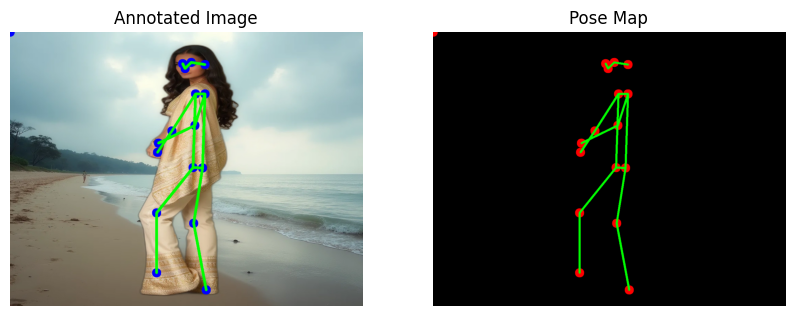

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

model = YOLO("yolov8n-pose.pt")

image_path = "final_outputs/6/final_out-0 (2).png"

image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    results = model(image)
    
    if results[0].keypoints is not None:
        keypoints = results[0].keypoints.xy.cpu().numpy()
        
        # Check if nose or eyes are present in the keypoints
        frontshot_detected = False
        for person_keypoints in keypoints:
            nose_keypoint = person_keypoints[0]  # Nose keypoint (index 0)
            left_eye_keypoint = person_keypoints[1]  # Left eye keypoint (index 1)
            right_eye_keypoint = person_keypoints[2]  # Right eye keypoint (index 2)

            if not np.any(np.isnan(nose_keypoint)) and not np.any(np.isnan(left_eye_keypoint)) and not np.any(np.isnan(right_eye_keypoint)):
                frontshot_detected = True
                break

        if frontshot_detected:
            print("Front shot detected!")
            skeleton_pairs = [
                (5, 7),   # Left shoulder to left elbow
                (7, 9),   # Left elbow to left wrist
                (6, 8),   # Right shoulder to right elbow
                (8, 10),  # Right elbow to right wrist
                (5, 6),   # Left shoulder to right shoulder
                (11, 12), # Left hip to right hip
                (5, 11),  # Left shoulder to left hip
                (6, 12),  # Right shoulder to right hip
                (11, 13), # Left hip to left knee
                (13, 15), # Left knee to left ankle
                (12, 14), # Right hip to right knee
                (14, 16), # Right knee to right ankle
                (0, 1),   # Nose to left eye
                (0, 2),   # Nose to right eye
                (1, 3),   # Left eye to left ear

            ]
        else:
            print("Backshot detected!")
            skeleton_pairs = [
                (5, 7),   # Left shoulder to left elbow
                (7, 9),   # Left elbow to left wrist
                (6, 8),   # Right shoulder to right elbow
                (8, 10),  # Right elbow to right wrist
                (5, 6),   # Left shoulder to right shoulder
                (11, 12), # Left hip to right hip
                (5, 11),  # Left shoulder to left hip
                (6, 12),  # Right shoulder to right hip
                (11, 13), # Left hip to left knee
                (13, 15), # Left knee to left ankle
                (12, 14), # Right hip to right knee
                (14, 16), # Right knee to right ankle
            ]

        # Create a copy of the image for annotation
        annotated_image = image.copy()

        for person_keypoints in keypoints:
            for keypoint in person_keypoints:
                x, y = int(keypoint[0]), int(keypoint[1])
                cv2.circle(annotated_image, (x, y), 15, (255, 0, 0), -1)  # Draw keypoints

        for person_keypoints in keypoints:
            for pair in skeleton_pairs:
                try:
                    point1 = person_keypoints[pair[0]]
                    point2 = person_keypoints[pair[1]]
                    cv2.line(annotated_image, 
                             (int(point1[0]), int(point1[1])), 
                             (int(point2[0]), int(point2[1])), 
                             (0, 255, 0), 8)  # Draw skeleton lines
                except IndexError:
                    continue

        pose_map = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
        for person_keypoints in keypoints:
            for keypoint in person_keypoints:
                x, y = int(keypoint[0]), int(keypoint[1])
                cv2.circle(pose_map, (x, y), 15, (255, 0, 0), -1)  # Draw keypoints on pose map
        for person_keypoints in keypoints:
            for pair in skeleton_pairs:
                try:
                    point1 = person_keypoints[pair[0]]
                    point2 = person_keypoints[pair[1]]
                    cv2.line(pose_map, 
                             (int(point1[0]), int(point1[1])), 
                             (int(point2[0]), int(point2[1])), 
                             (0, 255, 0), 5)  # Draw skeleton lines on pose map
                except IndexError:
                    continue

        # Convert BGR to RGB for plotting
        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 5))

        # Plot the annotated image
        plt.subplot(1, 2, 1)
        plt.imshow(annotated_image_rgb)
        plt.title("Annotated Image")
        plt.axis('off')  # Hide axis

        # Plot the pose map
        plt.subplot(1, 2, 2)
        plt.imshow(pose_map)
        plt.title("Pose Map")
        plt.axis('off')  # Hide axis

        plt.show()
